In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import graphistry
import random

from termcolor import colored

%matplotlib inline

# Part I: Graph datasets G1 and G2 description

#### Read data and create graph

#### Graph1: Brain networks, Edge: Fiber tracts
#### Graph2: Facebook netwok, Node: Person, Edge: Friendship, Social Relationship

In [2]:
dataset_path1 = 'dataset/bn-mouse-out.txt' 
dataset_path2 = 'dataset/socfb-Caltech36.txt'

In [3]:
graphistry.register(api=3, protocol="https", server="hub.graphistry.com", username="klavan16", password="abcd2323")

In [4]:
# This function is used for read the data and create the graph.
# dataset_path: dataset location
# return G: generated graph
def create_graph(dataset_path):
    G = nx.Graph()
    with open(dataset_path) as file:
        lines = file.readlines()
        for line in lines:
            nodes = line.split()
            G.add_edge(nodes[0], nodes[1])
    return G

In [5]:
G1 = create_graph(dataset_path1)
G2 = create_graph(dataset_path2)

#### Graph Informations

In [6]:
def print_graph_info(G):
    ds = list(G.degree())
    
    print('Number of nodes: {}'.format(G.number_of_nodes()))
    print('Number of edges: {}'.format(G.number_of_edges()))
    
    degree = [int(i) for i in np.array(list(G.degree()))[:,1]]
    
    print('Max degree: {}'.format(np.max(degree)))
    print('Min degree: {}'.format(np.min(degree)))
    print('Average degree: {}'.format(np.mean(degree)))
    print('Median degree: {}'.format(np.median(degree)))

In [7]:
# people (nodes), friendship (edges).
print(colored('Graph1 information', 'red'))
print_graph_info(G1)
print()
print(colored('Graph2 information', 'red'))
print_graph_info(G2)

Graph1 information
Number of nodes: 213
Number of edges: 11089
Max degree: 170
Min degree: 28
Average degree: 104.12206572769954
Median degree: 106.0

Graph2 information
Number of nodes: 769
Number of edges: 16656
Max degree: 248
Min degree: 1
Average degree: 43.3185955786736
Median degree: 36.0


In [8]:
graphistry.bind(source='src', destination='dst', node='nodeid').plot(G1)

In [9]:
graphistry.bind(source='src', destination='dst', node='nodeid').plot(G2)

#### Graph Adjacency Matrix

In [10]:
# This function is used to show adjacency matrix
# G: Graph
# ax: for show
# title: title of the adjacency matrix 
def show_adjacency_matrix(G, ax, title):
    A = nx.to_numpy_matrix(G, dtype=np.bool)
    
    ax.set_title(title)
    ax.imshow(A, cmap="Greys", interpolation="none")

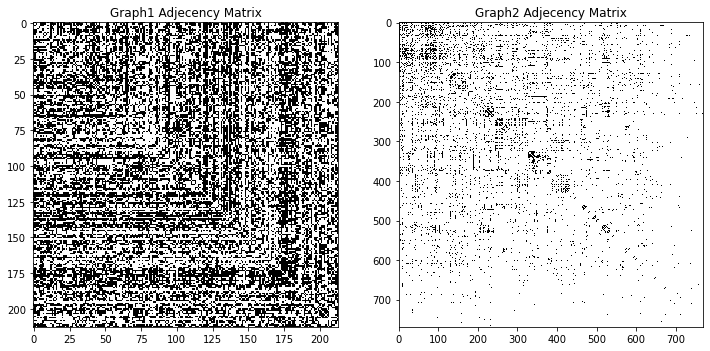

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 12))
show_adjacency_matrix(G1, ax1, 'Graph1 Adjecency Matrix')
show_adjacency_matrix(G2, ax2, 'Graph2 Adjecency Matrix')

#### Graph Degree Distribution

In [12]:
# This function is used to plot degree distribution
# G: Graph
# ax: for show 
# title: title of the degree distribution
def plot_degree_dist(G, ax, title):
    dfreq = np.array(nx.degree_histogram(G)).astype('float')
    x = np.array(range(len(dfreq)))
    poly = np.polyfit(x, dfreq, 15)
    poly_y = np.poly1d(poly)(x)
    ax.plot(x, poly_y)
    ax.set_title(title)
    ax.set_xlabel("Degree")
    ax.set_ylabel("Frequency")

In [13]:
# This function is used to plot degree distribution
# G1: Graph1
# G2: Graph2
# ax: for show 
# title: title of the degree distribution
def plot_degree_dist_overlay(G_list, ax, title, highlightLast = False):
    for i, G in enumerate(G_list):
        dfreq = np.array(nx.degree_histogram(G)).astype('float')
        x = np.array(range(len(dfreq)))
        poly = np.polyfit(x, dfreq, 15)
        poly_y = np.poly1d(poly)(x)
        if highlightLast and i != len(G_list) - 1:
            ax.plot(x, poly_y,linestyle = ":", alpha=0.7, linewidth=0.5)
        else:
            ax.plot(x, poly_y, linestyle='-', alpha=1, linewidth=2, color= 'blue' if highlightLast else None)
        
    ax.set_title(title)
    ax.set_xlabel("Degree")
    ax.set_ylabel("Frequency")

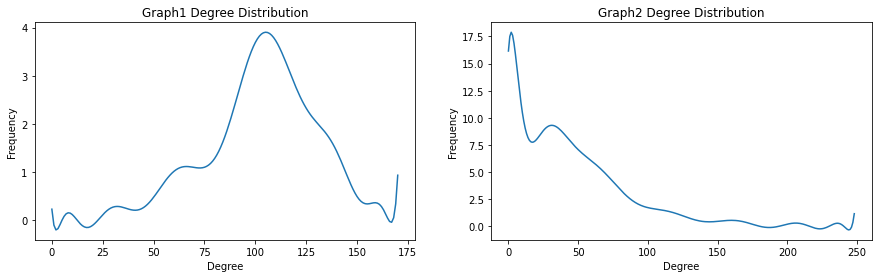

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
plot_degree_dist(G1, ax1, 'Graph1 Degree Distribution')
plot_degree_dist(G2, ax2, 'Graph2 Degree Distribution')

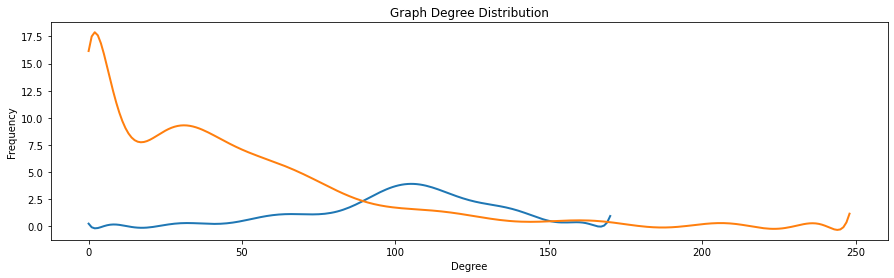

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
G_list = [G1, G2]
plot_degree_dist_overlay(G_list, ax, 'Graph Degree Distribution')

# Part 2: My graph theory principle: Rich Club

#### Rich club coefficient

In [16]:
# This function is used to generate random graph
# n: number of nodes
# p: random probability
def erdos_renyi(n, p):
    G = nx.Graph()
    
    G.add_nodes_from(set([i for i in range(n)]))
    
    for i in range(n):
        for j in range(n):
            if i != j and i < j:
                x = random.random()
                if x < p:
                    G.add_edge(i, j)
    return G

In [17]:
G3 = erdos_renyi(50, 0.33)
G4 = erdos_renyi(50, 0.66)

In [18]:
# This function is used to plot rich club coefficient
# G: Graph
# ax: for show
def plot_rich_club_coefficient(G, ax):
    dict_ = {}
    rcc = nx.rich_club_coefficient(G, normalized=False)
    
    keys = np.array(list(rcc.keys()))
    values = np.array(list(rcc.values()))
    
    poly = np.polyfit(keys, values, 15)
    poly_y = np.poly1d(poly)(keys)

    ax.plot(keys, poly_y)
    ax.set_xlabel("Node Degree")
    ax.set_ylabel("Average Rich Club Coefficient")

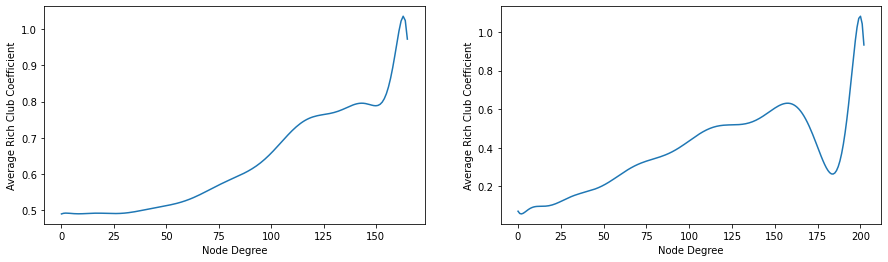

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
plot_rich_club_coefficient(G1, ax1)
plot_rich_club_coefficient(G2, ax2)

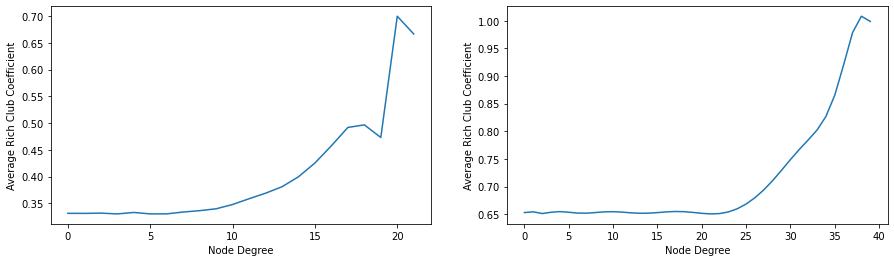

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
plot_rich_club_coefficient(G3, ax1)
plot_rich_club_coefficient(G4, ax2)

# Part 3: The R space

#### Random graph generation with given degree distribution

In [21]:
# This function is used  to find node degree
# G: Graph
# degrees: node degree list
def get_degrees(G):
    degrees = [val for (node, val) in G.degree()]
    return degrees

In [22]:
# This function is used to generate random graph
# degrees: node degree list
# N: number of graph to be generated
# return G_list: list of graph
def generate_random_graph(degrees, N):
    G_list = []
    
    for i in range(N):
        G = nx.expected_degree_graph(degrees, selfloops=False)
        G_list.append(G)
    return G_list

In [23]:
N = 100

In [24]:
degrees1 = get_degrees(G1)
G_list1 = generate_random_graph(degrees1, N)
G_list1.append(G1)

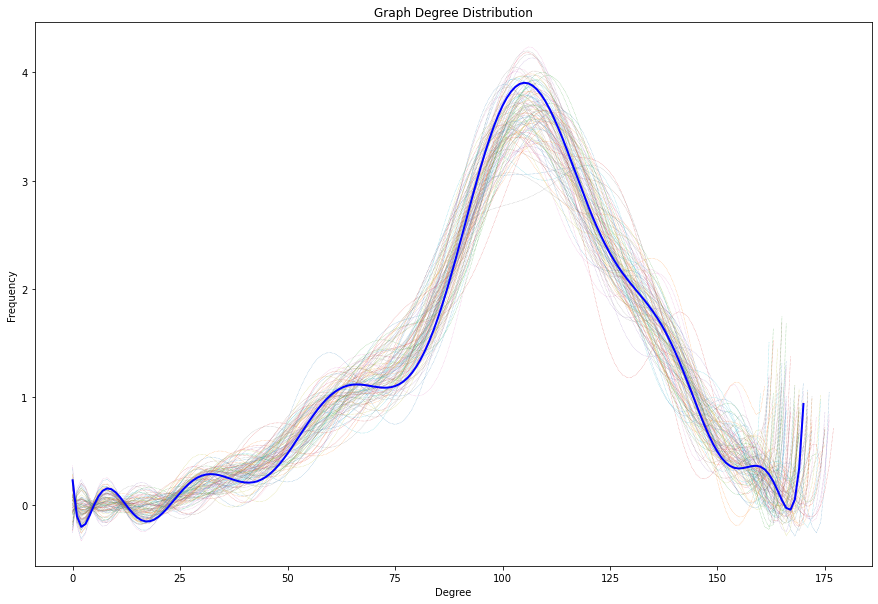

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
plot_degree_dist_overlay(G_list1[:], ax, 'Graph Degree Distribution',True)

In [26]:
degrees2 = get_degrees(G2)
G_list2 = generate_random_graph(degrees2, N)
G_list2.append(G2)

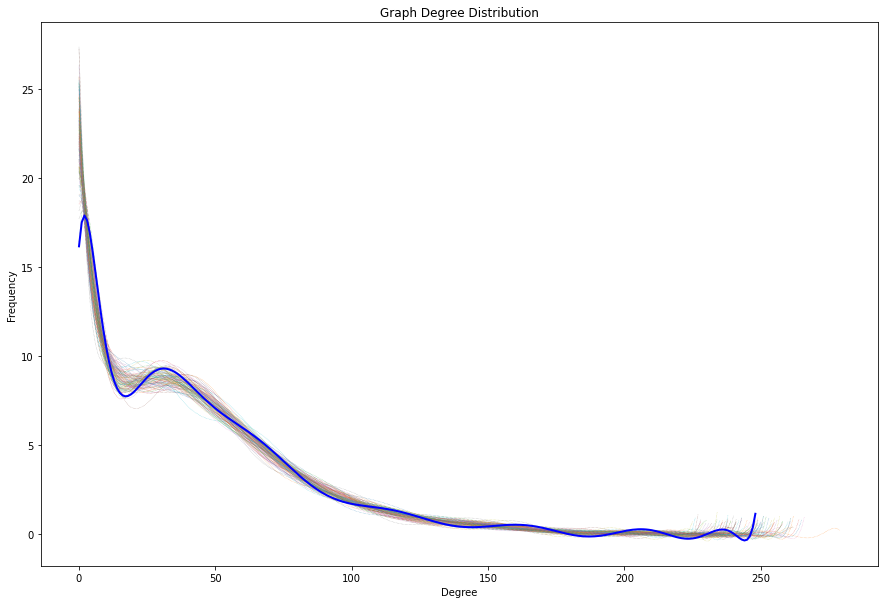

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
plot_degree_dist_overlay(G_list2[:], ax, 'Graph Degree Distribution',True)

#### Average Thresholded Rich Club Node Rate

While the maximum rich club value a node can get is 1, the minimum rich club value is 0. The average of these two values is 0.5. This value has been chosen as the average threshold value. Rich club values below this threshold value selected are not included in the calculation. This value is obtained by dividing the number of these nodes above the threshold value by the number of all nodes.

In [28]:
# This function is used to calculate average rich club node rate
# G: Graph
# thresh: Threshold value
# return rate: Graph rich club node rate value
def graph_rich_club_value(G, thresh):
    rcc = nx.rich_club_coefficient(G, normalized=False)
    
    cnt = 0
    for node in list(G.nodes):
        degree = G.degree[node]
        
        if degree in rcc:
            if thresh < rcc[degree]:
                cnt += 1
        else:
            cnt += 1
    
    rate = cnt / G.number_of_nodes()
    return rate

In [29]:
thresh = 0.5

In [30]:
node_rate1 = graph_rich_club_value(G1, thresh)
node_rate2 = graph_rich_club_value(G2, thresh)

#### Global Efficiency

In [31]:
# This function is used to calculate global efficiency
# G: Graph
# return Eglob: global efficiency value
def graph_global_efficiency_value(G):
    Eglob = nx.global_efficiency(G)
    return Eglob

In [32]:
s = graph_global_efficiency_value(G1)
s

0.7455709097351404

In [33]:
t = graph_global_efficiency_value(G2)
t

0.457744940670875

### Morpospace

In [34]:
# This function is used to find rich club and global efficiency value of graph
# G_list: Generated random graph
# return globs: global efficiency value
# return rclubs: rich club values
def create_morpospace_values(G_list):
    globs = []
    rclubs = []
    for key, _ in enumerate(G_list):
        G = G_list[key]
        
        glob = graph_global_efficiency_value(G)
        rclub = graph_rich_club_value(G, thresh)
        
        globs.append(glob)
        rclubs.append(rclub)
    
    return globs, rclubs

In [35]:
globs1, rclubs1 = create_morpospace_values(G_list1)

In [36]:
globs2, rclubs2 = create_morpospace_values(G_list2)

In [37]:
g_rclub1, r_rclub1 = rclubs1[:N], rclubs1[-1]
g_globs1, r_globs1 = globs1[:N], globs1[-1]

g_rclub2, r_rclub2 = rclubs2[:N], rclubs2[-1]
g_globs2, r_globs2 = globs2[:N], globs2[-1]

Text(0, 0.5, 'Global Efficiency')

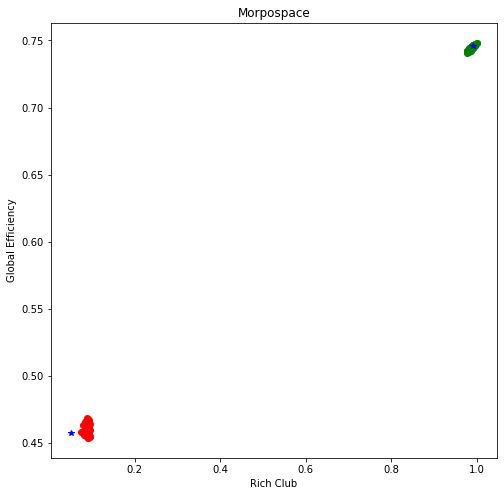

In [43]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(g_rclub1, g_globs1, 'o', color='green')
ax.plot(r_rclub1, r_globs1, '*', color='blue')
ax.plot(g_rclub2, g_globs2, 'o', color='red')
ax.plot(r_rclub2, r_globs2, '*', color='blue')
ax.set_title('Morpospace')
ax.set_xlabel('Rich Club')
ax.set_ylabel('Global Efficiency')

# Part 4: Result interpretation and discussion